<a href="https://colab.research.google.com/github/SapirBenHamo/EnergyProduction/blob/main/Energy%20_analysis_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup, Comment
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

url = 'https://www.worldometers.info/gdp/gdp-per-capita/'
response = requests.get(url)

tables = pd.read_html(response.text, header=0)

# Get the tables within the Comments
soup = BeautifulSoup(response.text, 'html.parser')
comments = soup.find_all(string=lambda text: isinstance(text, Comment))

for each in comments:
    if 'table' in str(each):
        try:
            table = pd.read_html(str(each), header=1)[0]
            table = table[table['Rk'].ne('Rk')].reset_index(drop=True)
            tables.append(table)
        except:
            continue



In [ ]:
DC = pd.DataFrame(tables[0])
DC = DC.head(50)
DC = DC['Country'].tolist()
print(DC)




['Qatar', 'Macao', 'Luxembourg', 'Singapore', 'Brunei', 'Ireland', 'United Arab Emirates', 'Kuwait', 'Switzerland', 'San Marino', 'Norway', 'Hong Kong', 'United States', 'Iceland', 'Netherlands', 'Denmark', 'Saudi Arabia', 'Austria', 'Germany', 'Sweden', 'Australia', 'Belgium', 'Bahrain', 'Canada', 'Finland', 'United Kingdom', 'France', 'Japan', 'Oman', 'Italy', 'Malta', 'New Zealand', 'Aruba', 'Spain', 'Israel', 'South Korea', 'Czech Republic (Czechia)', 'Slovenia', 'Cyprus', 'Estonia', 'Lithuania', 'Portugal', 'Slovakia', 'Trinidad and Tobago', 'Bahamas', 'Poland', 'Malaysia', 'Seychelles', 'Hungary', 'Saint Kitts & Nevis']


In [ ]:

df = pd.read_csv('Energy data_final project_0.5.csv')
df = df[df.year >= 2008]
df = df[df.year < 2018]
df['renewable_electricity'] = df['renewable_electricity']*1000
df['conventional_electricity'] = df['conventional_electricity']*1000
df['Total_Energy'] = df['renewable_electricity'] + df['conventional_electricity']
df['%OfRenEnergy'] = df['renewable_electricity']/ df['Total_Energy']
df['%OfConEnergy'] = df['conventional_electricity']/ df['Total_Energy']
df = df[df.Total_Energy > 0]

def Country_segmentation(df):
  AC = df['country']
  if AC in DC:
    output = 'High Level Gdp Per Capita'
  else:
    output = 'Low Level Gdp Per Capita'
  return output

In [ ]:
df = df.assign(Country_Segment = df.apply(Country_segmentation, axis=1))
df = df[['country','Country_Segment','year','conventional_electricity','renewable_electricity','Total_Energy']]

In [ ]:
df2 = df.groupby(['Country_Segment','year'])\
.agg(sum_con = ('conventional_electricity','sum'), 
     sum_ren = ('renewable_electricity','sum'),
     sum_total = ('Total_Energy','sum'))

df2 = df2.assign(Precentege_Of_RenewAble = df2['sum_ren'] / df2['sum_total'])
df2 = df2.assign(ofcon = df2['sum_con'] / df2['sum_total'])
df2=df2[['Precentege_Of_RenewAble']]*100
df2 = df2.round(0)

In [ ]:
df2

Precentege_Of_RenewAble
Country_Segment           year                         
High Level Gdp Per Capita 2008                     20.0
                          2009                     21.0
                          2010                     21.0
                          2011                     22.0
                          2012                     23.0
                          2013                     24.0
                          2014                     25.0
                          2015                     26.0
                          2016                     27.0
                          2017                     29.0
Low Level Gdp Per Capita  2008                     20.0
                          2009                     20.0
                          2010                     20.0
                          2011                     20.0
                          2012                     21.0
                          2013                     21.0
                          2014                     22.0
                          2015                     23.0
                          2016                     24.0
                          2017                     25.0

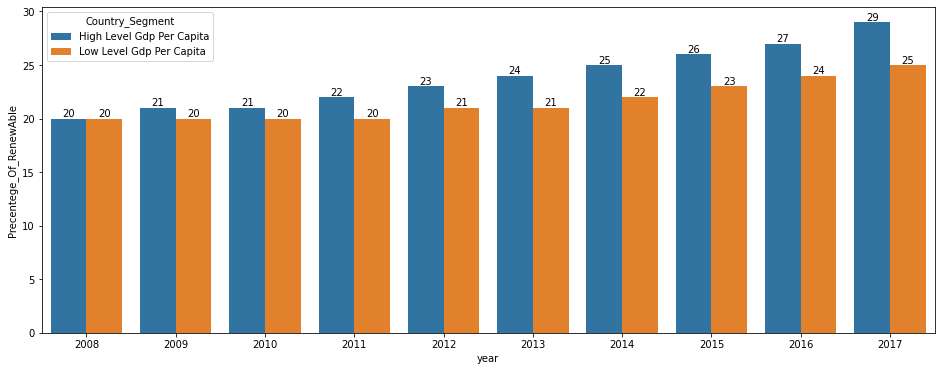

In [ ]:
df2.reset_index(inplace=True)
plt.figure(figsize=(16, 6))
ax = sns.barplot(x='year', y='Precentege_Of_RenewAble', hue='Country_Segment', data=df2)
for container in ax.containers:
    ax.bar_label(container)